# <font color="blue" size=6>Mini Project 1 :- Stock Market Analysis Using Python</font>

In [1]:
# Importing IMP Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
import statistics
import warnings
warnings.filterwarnings("ignore")

<font color="red" size=5>* Problem Statement 1 :-Read the Data from Yahoo finance website directly.</font>

In [2]:
# Import web to get data from Yahoo Finanace
import yfinance as yf

In [3]:
# Download data of 5 Years to perform analysis

# Amazon
amazon = yf.Ticker("AMZN")
df_amzn = amazon.history(period='max')

df_amzn = yf.download('AMZN',
                      start='2019-02-25',
                      end='2024-02-25',
                      progress=False
                      )
# Apple
apple = yf.Ticker("AAPL")
df_aapl = apple.history(period='max')

df_aapl = yf.download('AAPL',
                      start='2019-02-25',
                      end='2024-02-25',
                      progress=False
                      )

# Google
google = yf.Ticker("GOOG")
df_goog = google.history(period='max')

df_goog = yf.download('GOOG',
                      start='2019-02-25',
                      end='2024-02-25',
                      progress=False
                      )

microsoft = yf.Ticker("MSFT")
df_msft = microsoft.history(period='max')

df_msft = yf.download('MSFT',
                      start='2019-02-25',
                      end='2024-02-25',
                      progress=False
                      )


In [4]:
# Dataset Converted into dataframe using pandas
df_amzn = pd.DataFrame(df_amzn)
df_aapl = pd.DataFrame(df_aapl)
df_goog = pd.DataFrame(df_goog)
df_msft = pd.DataFrame(df_msft)

In [5]:
# Datashape Shape
print(df_amzn.shape)
print(df_aapl.shape)
print(df_goog.shape)
print(df_msft.shape)

(1259, 6)
(1259, 6)
(1259, 6)
(1259, 6)


<font color='red' size=5>*Problem Statement 2 :- Perform cleaning. </font>

In [6]:
# Check NaN values in all datasets
print(df_amzn.isnull().any(),df_aapl.isnull().any(),df_goog.isnull().any(),df_msft.isnull().any())

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [7]:
# Print the dataset
df_amzn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-25,82.072502,82.730003,81.519501,81.650002,81.650002,63690000
2019-02-26,81.299004,81.999496,80.806503,81.820000,81.820000,53316000
2019-02-27,81.408997,82.090500,80.754997,82.054497,82.054497,62976000
2019-02-28,81.762497,82.588501,81.691498,81.991501,81.991501,60518000
2019-03-01,82.756500,83.712997,82.550003,83.586502,83.586502,99498000
...,...,...,...,...,...,...
2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600
2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300
2024-02-21,168.940002,170.229996,167.139999,168.589996,168.589996,44575600


In [8]:
df_list = [df_amzn,df_aapl,df_goog,df_msft]

In [9]:
# resetting the index

for df in df_list:
    df.reset_index(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"]).dt.date

In [10]:
# printing coln names
df_amzn.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df_amzn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-25,82.072502,82.730003,81.519501,81.650002,81.650002,63690000
1,2019-02-26,81.299004,81.999496,80.806503,81.820000,81.820000,53316000
2,2019-02-27,81.408997,82.090500,80.754997,82.054497,82.054497,62976000
3,2019-02-28,81.762497,82.588501,81.691498,81.991501,81.991501,60518000
4,2019-03-01,82.756500,83.712997,82.550003,83.586502,83.586502,99498000
...,...,...,...,...,...,...,...
1254,2024-02-16,168.740005,170.419998,167.169998,169.509995,169.509995,48074600
1255,2024-02-20,167.830002,168.710007,165.740005,167.080002,167.080002,41980300
1256,2024-02-21,168.940002,170.229996,167.139999,168.589996,168.589996,44575600
1257,2024-02-22,173.100006,174.800003,171.770004,174.580002,174.580002,55392400


In [12]:
# details of dataset
print("Amazon : ")
print(df_amzn.info())
print()
print("Apple : ")
print(df_aapl.info())
print()
print("Google : ")
print(df_goog.info())
print()
print("Microsoft : ")
print(df_msft.info())

Amazon : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB
None

Apple : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259

<font color='red' size=5>Problem Statement 3:- What was the change in stock price over time? </font>

<font color='green' size=4> Solution:-Change In Amazon Stock Price : </font>

In [13]:
# Calculating max min avg and total_volume(amazon)
def analysis(stock_data):
  print(f"Maximum Price: {max_price:.3f}")
  print(f"Minimum Price: {min_price:.3f}")
  print(f"Average Price: {avg_price:.3f}")
  print(f"Total_volume : {total_volume:.0f}")
  return print

max_price = df_amzn["High"].max()
min_price = df_amzn["Low"].min()
avg_price = df_amzn["Close"].mean()
total_volume = df_amzn["Volume"].sum()

analysis(df_amzn)

Maximum Price: 188.654
Minimum Price: 79.328
Average Price: 129.937
Total_volume : 93106917900


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [14]:
difference_price = (max_price - min_price)
print(f"Change in stock price over time  : {difference_price:.2f}")

Change in stock price over time  : 109.33


<font color='green' size=5>Solution:- Change In Stock Price :[Apple, Google, Microsoft] </font>

In [15]:
datasets = {
    "Apple": df_aapl,
    "Google": df_goog,
    "Microsoft": df_msft
}
for name,df in datasets.items():
    max_price = df["High"].max()
    min_price = df["Low"].min()
    avg_price = df["Close"].mean()
    total_volume = df["Volume"].sum()
    print(name," :-")
    print(analysis(df))
    difference_price = (max_price - min_price)
    print(f"Change in stock price over time {name}  : {difference_price:.2f}")
    print()


Apple  :-
Maximum Price: 199.620
Minimum Price: 42.375
Average Price: 127.271
Total_volume : 125046210100
<built-in function print>
Change in stock price over time Apple  : 157.24

Google  :-
Maximum Price: 155.200
Minimum Price: 50.677
Average Price: 101.336
Total_volume : 36341411300
<built-in function print>
Change in stock price over time Google  : 104.52

Microsoft  :-
Maximum Price: 420.820
Minimum Price: 108.800
Average Price: 244.756
Total_volume : 36841460300
<built-in function print>
Change in stock price over time Microsoft  : 312.02



<font color='red' size=5>Problem Statement 4 :- Visualize the change in a stock’s volume being traded, over time?  </font>

<font color='green' size=4>Solution:- Visualization for Amazon Stock </font>

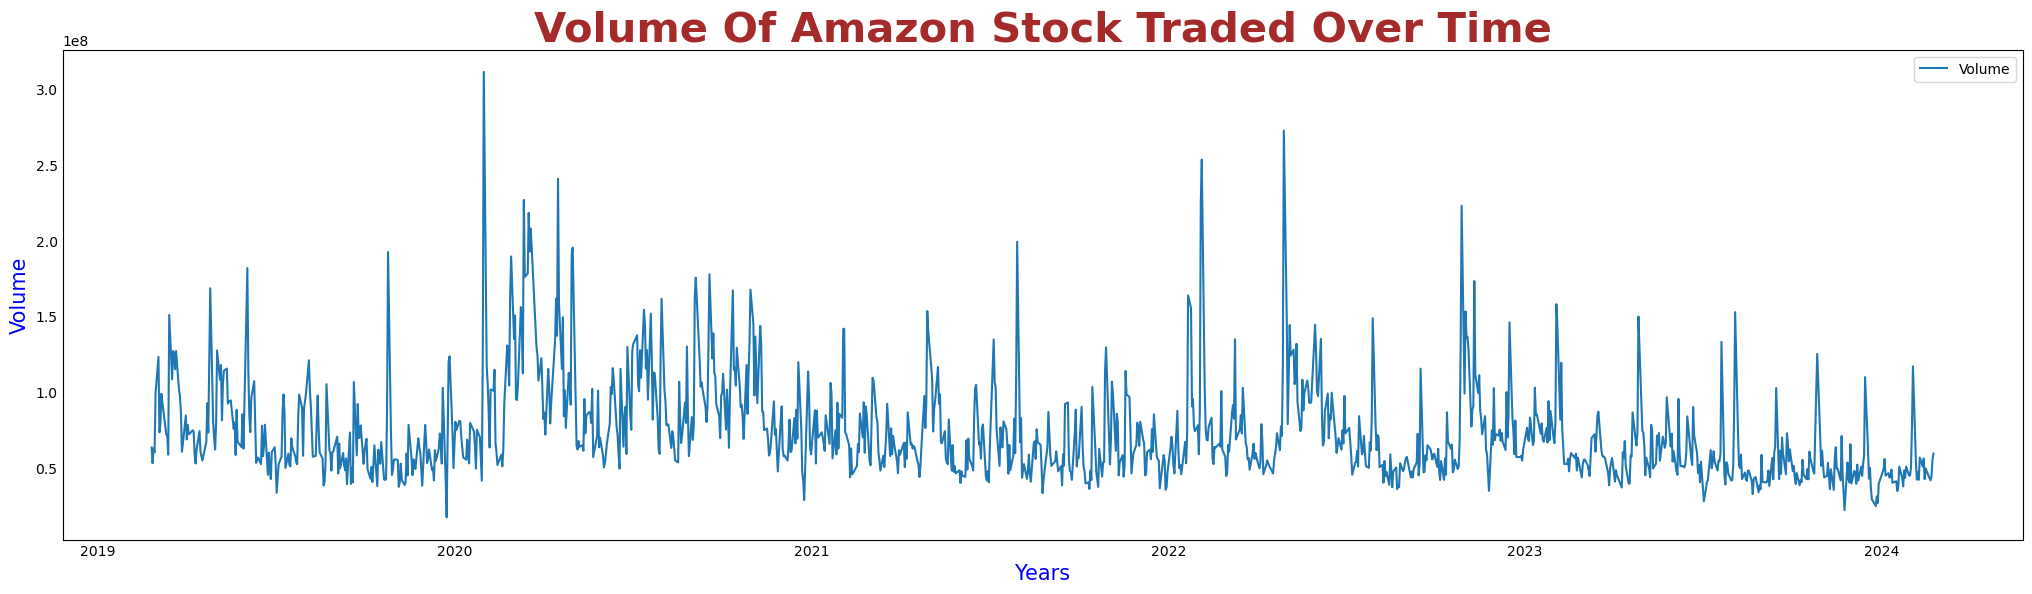

In [16]:
plt.style.use('_mpl-gallery')
plt.figure(figsize=(20,5))
sns.lineplot(x=df_amzn['Date'], y=df_amzn['Volume'], label='Volume')
plt.title("Volume Of Amazon Stock Traded Over Time",size=30, color='brown',fontweight='bold')
plt.xlabel("Years", size=15, color='b')
plt.ylabel("Volume", size=15, color='b')
plt.grid()
plt.show()

<font color='red' size=5>Problem Statement 5 :- What was the moving average of various stocks? </font>

In [17]:
# Moving avaerage of various stock
print("Moving Average of Following Stocks : ")
print()
datasets = {
    "Amazon": df_amzn,
    "Apple": df_aapl,
    "Google": df_goog,
    "Microsoft": df_msft
}

for name, df in datasets.items():
  avg_df = df["Close"].mean()
  print(f"Stock {name}:-",round(avg_df,2))


Moving Average of Following Stocks : 

Stock Amazon:- 129.94
Stock Apple:- 127.27
Stock Google:- 101.34
Stock Microsoft:- 244.76


<font color='red' size=4>Problem Statement 6 :- What was the daily return average of a stock? </font>

In [18]:
# Create a new column of values daily return
for df in df_list:
  df["Daily return"]=df["Close"].pct_change().fillna(0)

<font color='green' size=3>Solution:- Daily Return of Stocks </font>

In [19]:
# The daily return average of a stock?
print("The Daily Return Average of Stocks : ")
print()
for name, df in datasets.items():
  print(f"{name}:-",round(df["Daily return"].iloc[1:].mean(),4))

The Daily Return Average of Stocks : 

Amazon:- 0.0009
Apple:- 0.0013
Google:- 0.001
Microsoft:- 0.0012


<font color='red' size=5>Problem Statement 7 :- Add a new column ‘Trend’ whose values are based on the 'Daily Return'. </font>

In [20]:
for df in df_list:
    df["Trend"] = 'Stable'
    df.loc[df["Daily return"] > 0, 'Trend'] = 'Up'
    df.loc[df["Daily return"] < 0, 'Trend'] = 'Down'
df_amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily return,Trend
0,2019-02-25,82.072502,82.730003,81.519501,81.650002,81.650002,63690000,0.000000,Stable
1,2019-02-26,81.299004,81.999496,80.806503,81.820000,81.820000,53316000,0.002082,Up
2,2019-02-27,81.408997,82.090500,80.754997,82.054497,82.054497,62976000,0.002866,Up
3,2019-02-28,81.762497,82.588501,81.691498,81.991501,81.991501,60518000,-0.000768,Down
4,2019-03-01,82.756500,83.712997,82.550003,83.586502,83.586502,99498000,0.019453,Up


<font color='red' size=5>Problem Statement 8 :- Visualize trend frequency through a Pie Chart.  </font>

In [21]:
a = df_amzn.groupby("Trend")["Trend"].count()
b = df_aapl.groupby("Trend")["Trend"].count()
c = df_goog.groupby("Trend")["Trend"].count()
d = df_msft.groupby("Trend")["Trend"].count()
print("Amazon :-",a)
print()
print("Apple :-",b)
print()
print("Google :-",c)
print()
print("Microsoft :-",d)

Amazon :- Trend
Down      600
Stable      3
Up        656
Name: Trend, dtype: int64

Apple :- Trend
Down      590
Stable      4
Up        665
Name: Trend, dtype: int64

Google :- Trend
Down      575
Stable      1
Up        683
Name: Trend, dtype: int64

Microsoft :- Trend
Down      580
Stable      5
Up        674
Name: Trend, dtype: int64


<font color='green' size=5 ><b>Combined Analysis</b></font>

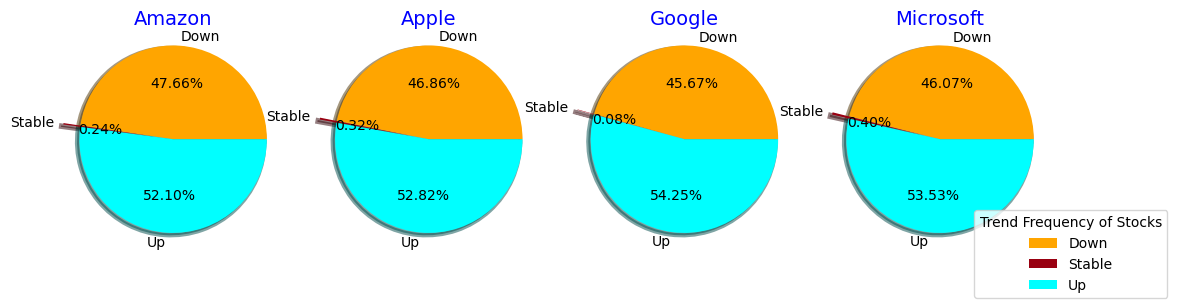

In [22]:
fig, ax = plt.subplots(1,4, figsize=(10,7))

color=['orange','#990011','cyan']
explode = (0.0, 0.2, 0.0)
ax[0].pie(a,autopct='%0.2f%%',labels=a.index,colors=color,radius=1.1,shadow=True
            ,explode=explode,wedgeprops = {'linewidth': 3})
ax[0].set_title("Amazon",color='blue',size=14)

color=['orange','#990011','cyan']
explode = (0.0, 0.2, 0.0)
ax[1].pie(b,autopct='%0.2f%%',labels=b.index,colors=color,radius=1.1,shadow=True,
            explode=explode,wedgeprops = {'linewidth': 3})
ax[1].set_title("Apple",color='blue',size=14)

color=['orange','#990011','cyan']
explode = (0.0, 0.2, 0.0)
ax[2].pie(c,autopct='%0.2f%%',labels=c.index,colors=color,radius=1.1,shadow=True
            ,explode=explode,wedgeprops = {'linewidth': 3})
ax[2].set_title("Google",color='blue',size=14)

color=['orange','#990011','cyan']
explode = (0.0, 0.2, 0.0)
ax[3].pie(d,autopct='%0.2f%%',colors=color,radius=1.1,explode=explode,shadow=True,
          labels=d.index,wedgeprops = {'linewidth': 3})
ax[3].set_title("Microsoft",color='blue',size=14)

plt.legend(loc="upper right",title="Trend Frequency of Stocks",bbox_to_anchor=(1.6,0.2))
plt.show()

<font color='red' size=5>Problem Statement 9 :- What was the correlation between the daily returns of different stocks? </font>

<font size=5><b><u> Correlation Between Stocks Using Combined Analysis</u></b></font>

<Axes: >

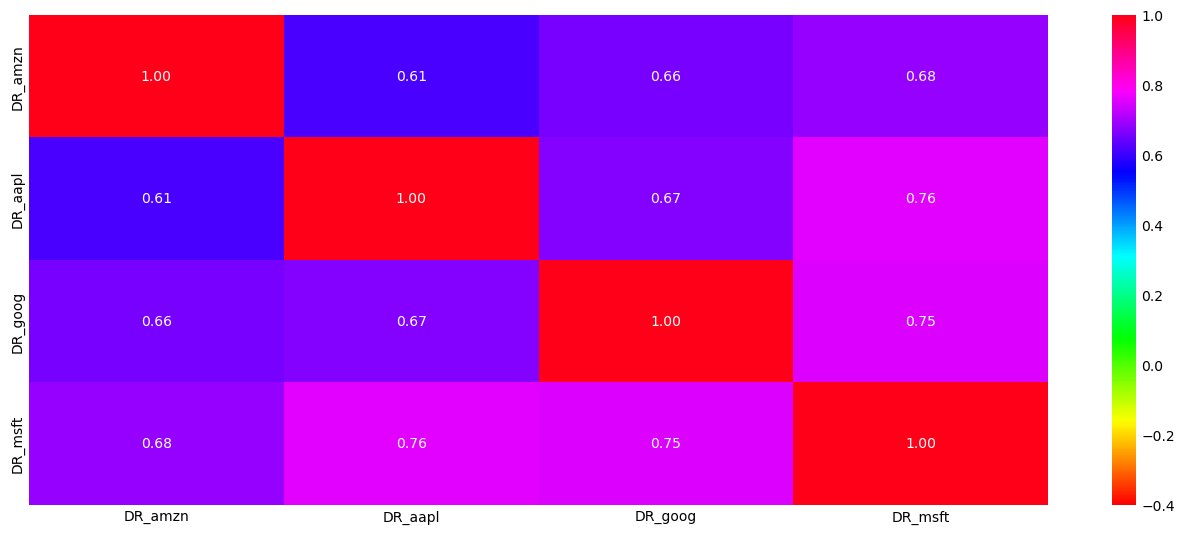

In [23]:
col_amzn = df_amzn["Daily return"]
col_aapl = df_aapl["Daily return"]
col_goog = df_goog["Daily return"]
col_msft = df_msft["Daily return"]

combined_df = pd.concat([col_amzn,col_aapl,col_goog,col_msft],axis=1)

combined_df.columns=["DR_amzn","DR_aapl","DR_goog","DR_msft"]
Stock_correaltion= combined_df.corr()

plt.figure(figsize=(13,5))
sns.heatmap(Stock_correaltion,annot=True, cmap="hsv", fmt=".2f",vmin=-0.4)

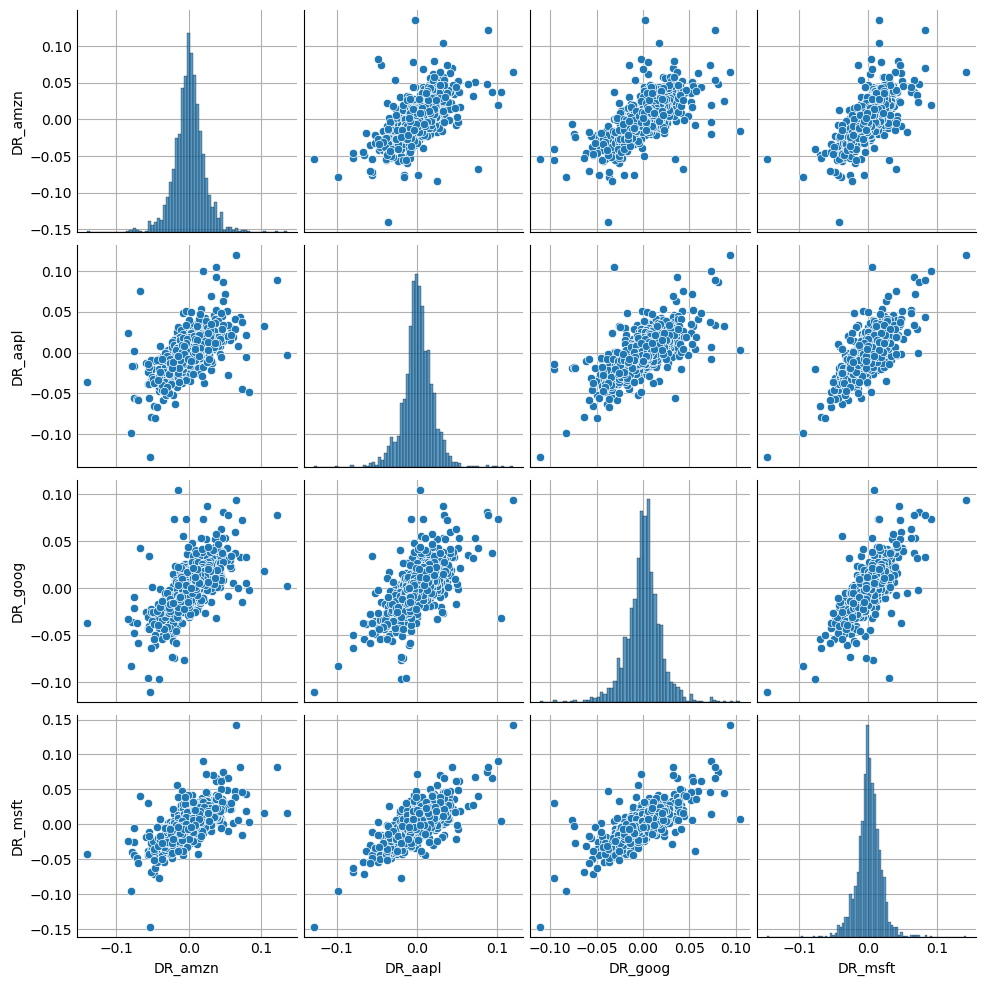

In [24]:
sns.pairplot(combined_df)
plt.show()

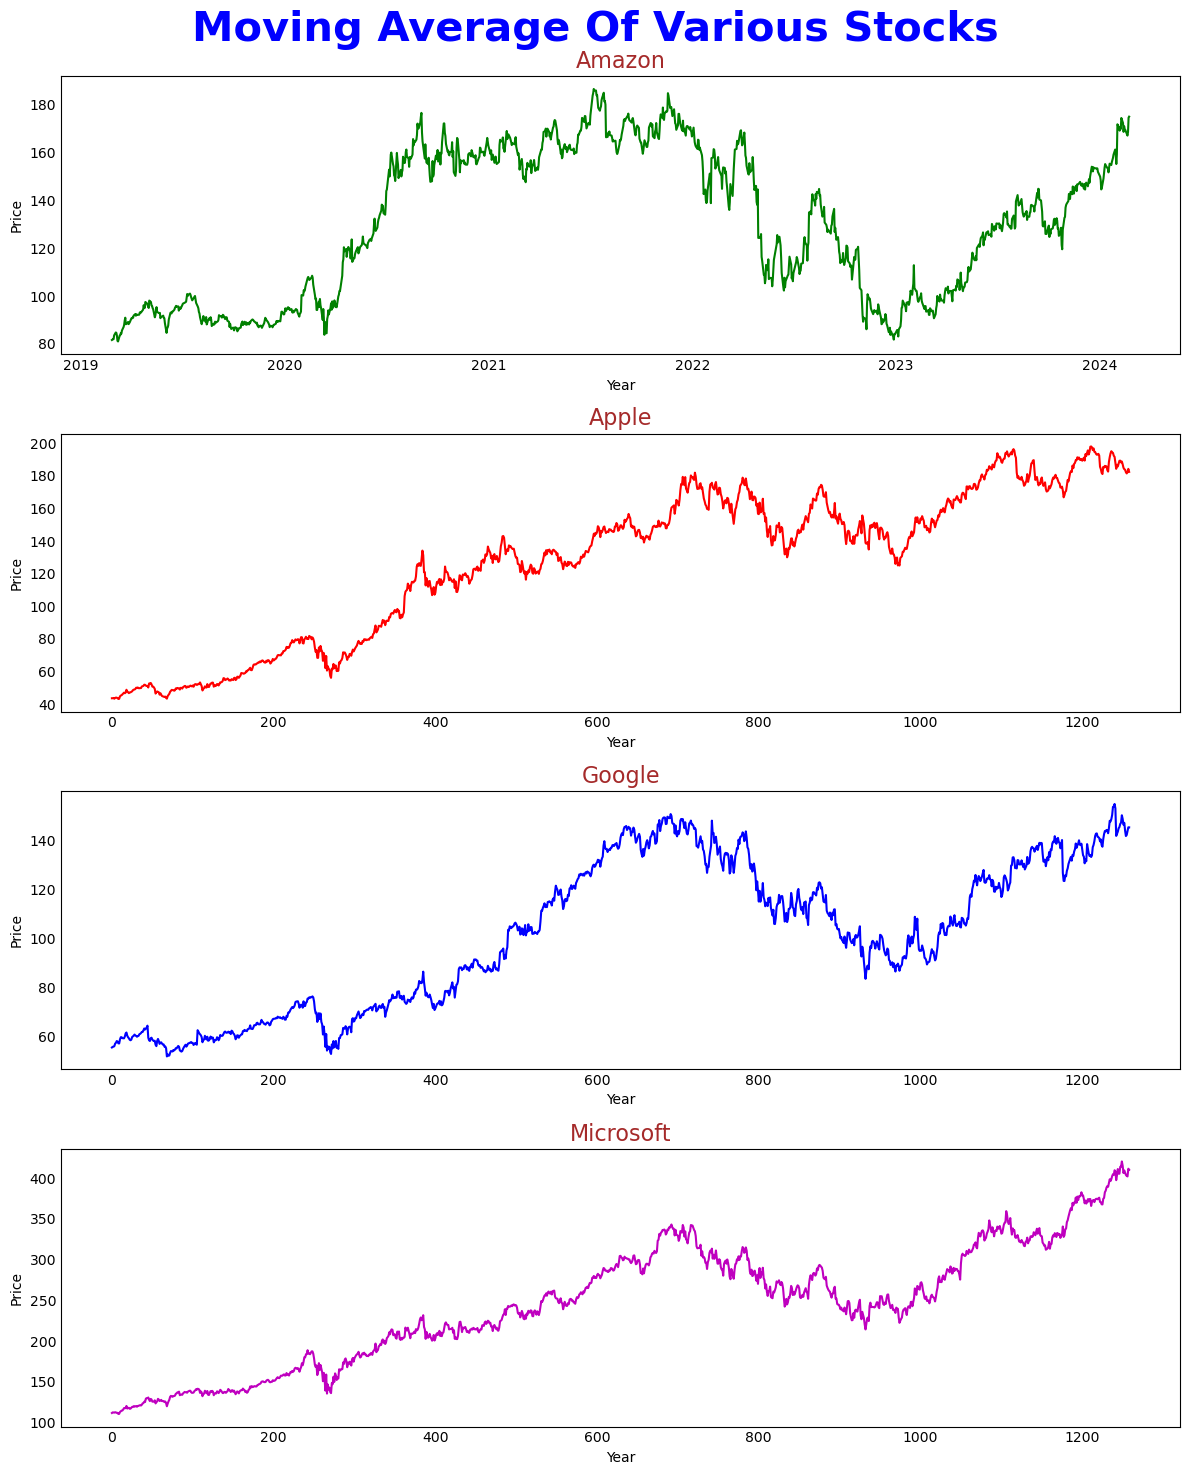

In [25]:
fig, ax = plt.subplots(4,1, figsize=(12,15))
plt.subplots_adjust(wspace=0.5,hspace=0.5)

ax[0].plot(df_amzn['Date'],df_amzn["Close"],label="Amazon",color='green')
ax[0].set_title("Amazon",color='brown',size=16)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")
ax[0].grid()

ax[1].plot(df_aapl['Close'],label="Apple",color='red')
ax[1].set_title("Apple",color='brown',size=16)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Price")
ax[1].grid()

ax[2].plot(df_goog['Close'],label="Google",color='blue')
ax[2].set_title("Google",color='brown',size=16)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Price")
ax[2].grid()

ax[3].plot(df_msft['Close'],label="Microsoft",color='m')
ax[3].set_title("Microsoft",color='brown',size=16)
ax[3].set_xlabel("Year")
ax[3].set_ylabel("Price")
ax[3].grid()

fig.suptitle("Moving Average Of Various Stocks",fontweight="bold",color='blue',fontsize=30)
plt.tight_layout()
plt.show()

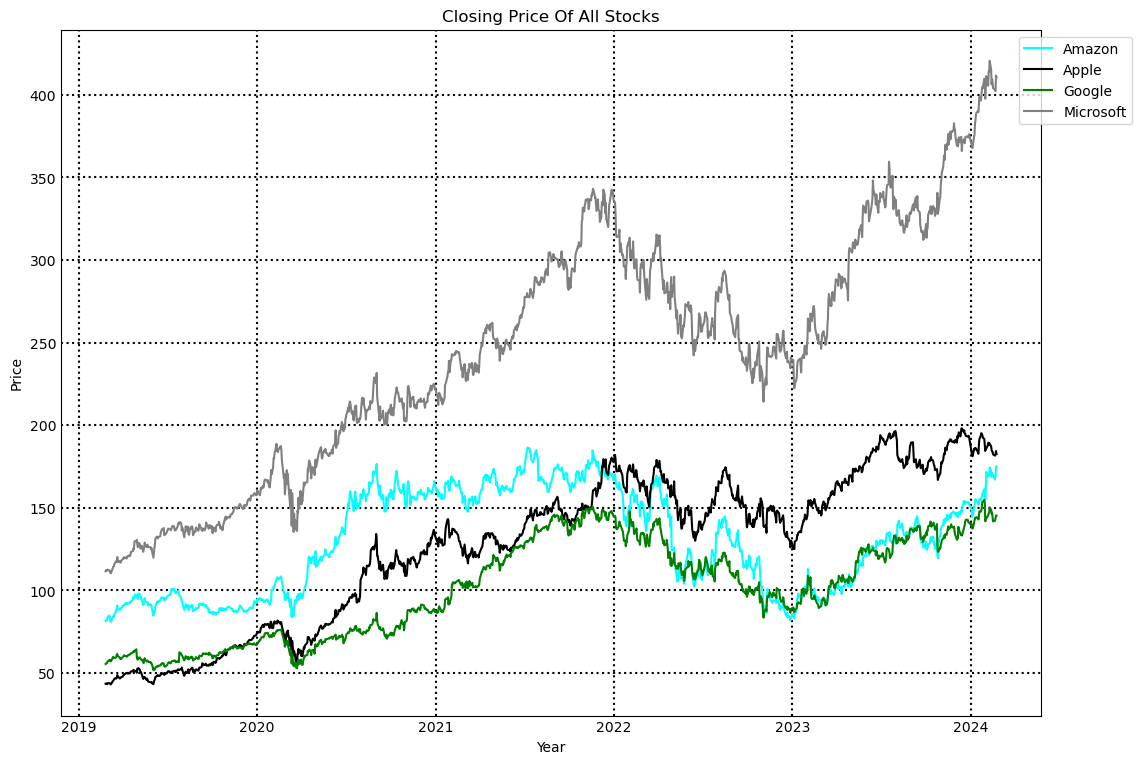

In [26]:
plt.figure(figsize=(10,7))
plt.plot(df_amzn['Date'], df_amzn["Close"], label="Amazon",color='cyan')
plt.plot(df_aapl['Date'], df_aapl["Close"], label="Apple",color='black')
plt.plot(df_goog['Date'], df_goog["Close"], label="Google",color='green')
plt.plot(df_msft['Date'], df_msft["Close"], label="Microsoft",color='gray')

plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(loc="upper right", bbox_to_anchor=(1.1,1) )
plt.grid(True, color='k',linewidth=1.5, linestyle=':')
plt.title("Closing Price Of All Stocks")
plt.show()

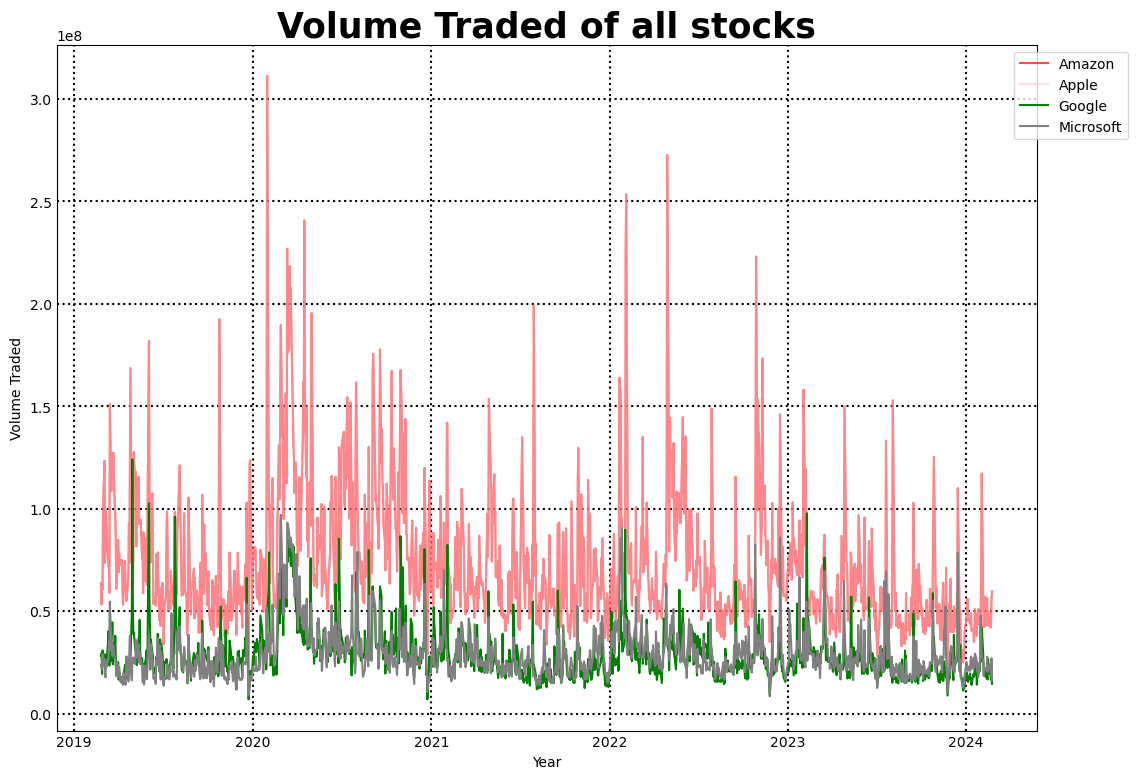

In [35]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df_amzn["Date"],y=df_amzn["Volume"], label="Amazon",color='red',alpha=0.7)
sns.lineplot(x=df_amzn["Date"],y=df_amzn["Volume"], label="Apple",color='pink',alpha=0.5)
sns.lineplot(x=df_amzn["Date"],y=df_goog["Volume"], label="Google",color='green')
sns.lineplot(x=df_amzn["Date"],y=df_msft["Volume"], label="Microsoft",color='gray')

plt.xlabel("Year")
plt.ylabel("Volume Traded")
plt.legend(loc="upper right", bbox_to_anchor=(1.1,1) )
plt.grid(True, color='k',linewidth=1.5, linestyle=':')
plt.title("Volume Traded of all stocks",fontweight='bold',size=25)
plt.show()